In [1]:
# Import required libraries
import tensorflow as tf
tf.set_random_seed(42)
import numpy as np
import matplotlib.pyplot as plt


In [1]:
!pip install --upgrade pip

  Using cached https://files.pythonhosted.org/packages/54/0c/d01aa759fdc501a58f431eb594a17495f15b88da142ce14b5845662c13f3/pip-20.0.2-py2.py3-none-any.whl
  Found existing installation: pip 10.0.1
    Uninstalling pip-10.0.1:
      Successfully uninstalled pip-10.0.1


In [3]:
!pip install librosa --user

Processing /home/ec2-user/.cache/pip/wheels/4c/6e/d7/bb93911540d2d1e44d690a1561871e5b6af82b69e80938abef/librosa-0.7.2-cp36-none-any.whl
Processing /home/ec2-user/.cache/pip/wheels/fa/c1/56/e0e12c6f7f3d2cdea9712b35136a2d40a7817c6210ec096485/resampy-0.2.2-cp36-none-any.whl
  Using cached https://files.pythonhosted.org/packages/ba/49/61522f34b1333aa4e9aa02005dc0774d25bd234400dff718b16615d6a744/numba-0.48.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/eb/f2/3cbbbf3b96fb9fa91582c438b574cff3f45b29c772f94c400e2c99ef5db9/SoundFile-0.10.3.post1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/ad/bb/60d4033d56c9da36490af19caa6c794b72b8aef6f792fdfa8cb95d11e419/llvmlite-0.31.0-cp36-cp36m-manylinux1_x86_64.whl


In [2]:
!conda install -c conda-forge librosa -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.12
  latest version: 4.8.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/ec2-user/anaconda3/envs/tensorflow_p36

  added / updated specs: 
    - librosa


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    librosa-0.7.2              |             py_0         1.5 MB  conda-forge
    pysoundfile-0.10.2         |          py_1001          21 KB  conda-forge
    libsndfile-1.0.28          |    he1b5a44_1000         529 KB  conda-forge
    tk-8.6.10                  |       hed695b0_0         3.2 MB  conda-forge
    pykerberos-1.2.1           |   py36h505690d_0          26 KB  conda-forge
    libcurl-7.68.0             |       hda55be3_0         564 KB  conda-forge
    audioread-2.1.8            |           py36

In [3]:
import librosa

In [4]:
s, sr = librosa.load('train_clean_male.wav', sr=None)
S = librosa.stft(s, n_fft=1024, hop_length=512)
sn, sr = librosa.load('train_dirty_male.wav', sr=None)
X = librosa.stft(sn, n_fft=1024, hop_length=512)

In [5]:
print(S.shape)
print(S.T.shape)

(513, 2459)
(2459, 513)


In [6]:
print(X.shape)
print(X.T.shape)

(513, 2459)
(2459, 513)


In [7]:
s1, s1_sr=librosa.load('test_x_01.wav', sr=None)
S1 = librosa.stft(s1, n_fft=1024, hop_length=512)
s2, s2_sr=librosa.load('test_x_02.wav', sr=None)
S2 = librosa.stft(s2, n_fft=1024, hop_length=512)

In [8]:
print(S1.shape)
print(S1.T.shape)

(513, 142)
(142, 513)


In [9]:
print(S2.shape)
print(S2.T.shape)

(513, 380)
(380, 513)


In [11]:
import tensorflow as tf
tf.set_random_seed(42)
import numpy as np
import matplotlib.pyplot as plt

In [12]:
abs_of_X_transpose = np.abs(X.T)

In [13]:
abs_of_S_transpose = np.abs(S.T)

In [14]:
abs_of_S1_transpose = np.abs(S1.T)
abs_of_S2_transpose = np.abs(S2.T)

In [15]:
x = tf.placeholder('float', shape=(None, 513))
y = tf.placeholder('float', shape=(None, 513))

In [16]:
def build_graph_speech_denoising(x, optimizer, learning_rate=0.001):
    """
    """
    # Layer 1
    w1 = tf.Variable(tf.random_normal(shape=[513, 1024], stddev=tf.sqrt(2/(513+1024))), name='w1')
    z1 = tf.matmul(x,w1)
    bn1 = batch_norm(z1)
    l1 = tf.nn.dropout(bn1, 1)
    
    # Layer 2
    w2 = tf.Variable(tf.random_normal(shape=[1024, 1024], stddev=tf.sqrt(2/(1024+1024))), name='w2')
    z2 = tf.matmul(l1,w2)
    bn2 = batch_norm(z2)
    l2 = tf.nn.dropout(bn2, 1)

    # Layer 3
    w3 = tf.Variable(tf.random_normal(shape=[1024, 1024], stddev=tf.sqrt(2/(1024+1024))), name='w3')
    z3 = tf.matmul(l2,w3)
    bn3 = batch_norm(z3)
    l3 = tf.nn.dropout(bn3, 1)

#     # Layer 4
#     w4 = tf.Variable(tf.random_normal(shape=[1024, 1024], stddev=tf.sqrt(2/(1024+1024))), name='w4')
#     z4 = tf.matmul(l3,w4)
#     bn4 = batch_norm(z4)
#     l4 = tf.nn.relu(bn4)

#     # Layer 5
#     w5 = tf.Variable(tf.random_normal(shape=[1024, 1024], stddev=tf.sqrt(2/(1024+1024))), name='w5')
#     z5 = tf.matmul(l4,w5)
#     bn5 = batch_norm(z5)
#     l5 = tf.nn.relu(bn5)

    # output layer
    wo = tf.Variable(tf.random_normal(shape=[1024, 513], stddev=tf.sqrt(2/(1024+513))), name='wo')
    bo = tf.Variable(tf.random_normal([513]), name='bo')
    output = tf.nn.relu(tf.add(tf.matmul(l3, wo) , bo))
    
    cross_entropy = tf.losses.mean_squared_error(y, output, weights=1.0)
    
    training=None
    
    if optimizer == 'Adam':
        training = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cross_entropy)
    else:
        training = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cross_entropy)
    
    return {
        'l1': l1,
        'l2': l2,
        'loutput': output,
        'cross_entropy': cross_entropy,
        'training': training
    }

In [18]:
def batch_norm(inputs, var_epsilon=0.001):
    """
    Performs batch normalization by calculating mean, variance.
    It then performs scaling and shifting to get the final output of the batch transformation
    """
    input_mean, input_var = tf.nn.moments(inputs, [0])
    scale = tf.Variable(tf.ones([1024]))
    shift = tf.Variable(tf.zeros([1024]))
    return tf.nn.batch_normalization(inputs, input_mean, input_var, shift, scale, var_epsilon)

In [19]:
speech_output = build_graph_speech_denoising(x, optimizer='Adam')

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [21]:
init = tf.global_variables_initializer()
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

In [22]:
batch_size = 100
with tf.Session(config=config) as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(1500):
        loss_per_epoch = []
        a = 0
        for _ in range(int(abs_of_X_transpose.shape[0]/batch_size)):
            j = a + batch_size
            if j > abs_of_X_transpose.shape[0]:
                j=abs_of_X_transpose.shape[0]
            batch_x = abs_of_X_transpose[a:j]
            batch_y = abs_of_S_transpose[a:j]
            a = j + 1
            _, l = sess.run([speech_output['training'], speech_output['cross_entropy']], feed_dict={
                x: batch_x,
                y: batch_y
            })
            loss_per_epoch.append(l)
        if epoch % 100 == 0:
            print("Loss: " + str(l) + ", Epoch: " + str(epoch))
            
    S1_pred = sess.run(speech_output['loutput'], feed_dict = {
        x: abs_of_S1_transpose
    })
    S2_pred = sess.run(speech_output['loutput'], feed_dict = {
        x: abs_of_S2_transpose
    })

Loss: 0.4204429, Epoch: 0
Loss: 0.0038268394, Epoch: 100
Loss: 0.0036107372, Epoch: 200
Loss: 0.0031872054, Epoch: 300
Loss: 0.00245058, Epoch: 400
Loss: 0.0026164758, Epoch: 500
Loss: 0.0023089526, Epoch: 600
Loss: 0.0021427656, Epoch: 700
Loss: 0.0019818232, Epoch: 800
Loss: 0.0019513023, Epoch: 900
Loss: 0.0016375543, Epoch: 1000
Loss: 0.0014849413, Epoch: 1100
Loss: 0.0014613925, Epoch: 1200
Loss: 0.0014743371, Epoch: 1300
Loss: 0.0012964216, Epoch: 1400


In [27]:
S1_spectrogram = (S1/abs_of_S1_transpose.T)* S1_pred.T
S2_spectrogram = (S2/abs_of_S2_transpose.T)* S2_pred.T

In [28]:
S1_inverse_STFT = librosa.istft(S1_spectrogram, win_length= 1024, hop_length=512)
S2_inverse_STFT = librosa.istft(S2_spectrogram, win_length= 1024, hop_length=512)

In [29]:
librosa.output.write_wav('test_s_01_recons.wav', S1_inverse_STFT, s1_sr)
librosa.output.write_wav('test_s_02_recons.wav', S2_inverse_STFT, s2_sr)

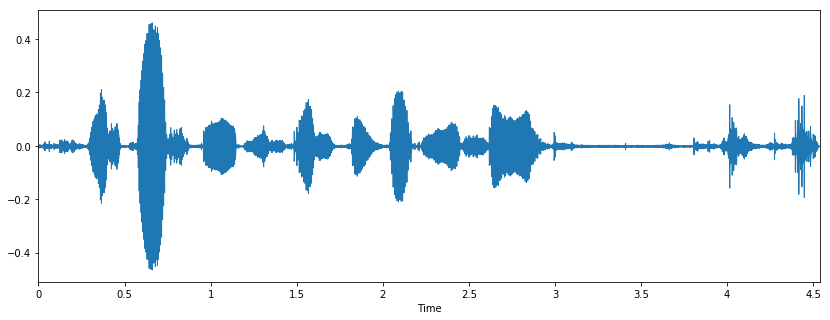

In [30]:
import librosa.display
plt.figure(figsize=(14,5))
librosa.display.waveplot(s1, sr=s1_sr)


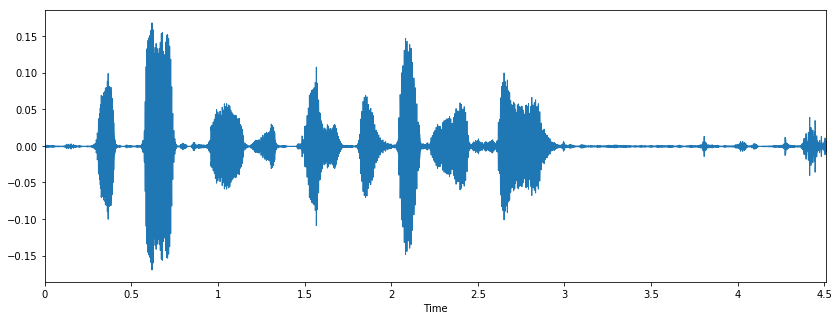

In [31]:
import librosa.display
plt.figure(figsize=(14,5))
librosa.display.waveplot(S1_inverse_STFT, sr=s1_sr)

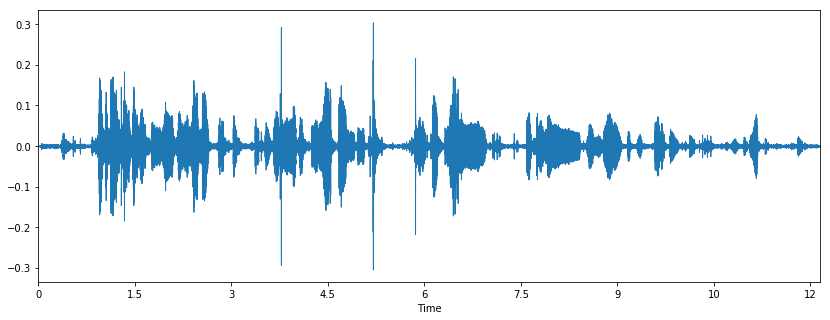

In [32]:
import librosa.display
plt.figure(figsize=(14,5))
librosa.display.waveplot(s2, sr=s2_sr)

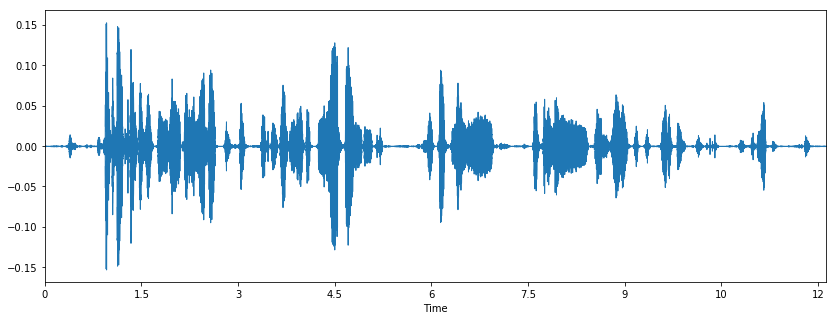

In [33]:
import librosa.display
plt.figure(figsize=(14,5))
librosa.display.waveplot(S2_inverse_STFT, sr=s2_sr)